# Projeto Final - Machine Learning
## Helton Souza Lima - helton.souza@dataprev.gov.br

### Exploração dos dados

Primeiro passo deste notebook é fazer a leitura do arquivo consolidado para a criação de um DataFrame Pandas, além dos imports necessários para as outras seções deste notebook. Como forma de visualizar a correta leitura e uma breve amostra do arquivo, conseguimos enxergar as 5 primeiras linhas e algumas colunas. Como são muitas colunas a serem exibidas, várias delas foram ocultadas.

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Realizando a leitura do arquivo com todos os dados
data_origin = pd.read_csv('BolsaFamiliaEIndicesSociais_PorMunicipio_2010.csv')
#Imprimindo as cinco primeiras linhas e uma quantidade de 19 colunas escolhidas aleatoriamente
data_origin.head()

,ano,codmun6,ibge,anomes,qtd_familias_beneficiarias_bolsa_familia,valor_repassado_bolsa_familia,uf,codmun7,município,espvida,...,pia1517,pia18m,pop,popt,i_escolaridade,i_freq_prop,idhm,idhm_e,idhm_l,idhm_r
0,2010,110001,110001,201001,1998,175027.0,11,1100015,ALTA FLORESTA D'OESTE,70.75,...,1602.0,16431.0,24097,22429,368,629,641,526,763,657
1,2010,110002,110002,201001,5268,453317.0,11,1100023,ARIQUEMES,73.36,...,5256.0,60213.0,89766,88730,514,648,702,600,806,716
2,2010,110003,110003,201001,525,51161.0,11,1100031,CABIXI,70.39,...,381.0,4306.0,6303,6156,357,700,650,559,757,650
3,2010,110004,110004,201001,5424,491901.0,11,1100049,CACOAL,74.27,...,4547.0,54356.0,78141,76876,488,698,718,620,821,727
4,2010,110005,110005,201001,1263,109869.0,11,1100056,CEREJEIRAS,72.94,...,1033.0,11786.0,16942,16815,430,712,692,602,799,688


#### Análise individual de variáveis

Para aprofundar um pouco a análise de variáveis, foi realizada uma leitura de todas as descrições das variáveis e algumas delas foram selecionadas para verificação individual, exibindo a quantidade, a média, o desvio-padrão, o valor mínimo, valor máximo e valores que contemplam cada quartil. Abaixo deste resumo, um gráfico exibindo a quantidade de valores.

##### Variável "valor_repassado_bolsa_familia"

In [132]:
#Utilizando o método describe para descrição de variáveis cujo valor é numérico
data_origin['valor_repassado_bolsa_familia'].describe()

count    5.565000e+03
mean     2.073653e+05
std      5.952418e+05
min      0.000000e+00
25%      3.453700e+04
50%      8.771500e+04
75%      2.111180e+05
max      1.584560e+07
Name: valor_repassado_bolsa_familia, dtype: float64

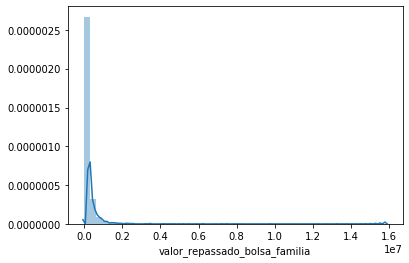

In [133]:
#Utilizando a biblioteca SeaBorn para visualização da frequência dos valores dentro das variáveis
sns.distplot(data_origin['valor_repassado_bolsa_familia'])

##### Variável "qtd_familias_beneficiarias_bolsa_familia"

In [134]:
data_origin['qtd_familias_beneficiarias_bolsa_familia'].describe()

count      5565.000000
mean       2246.234322
std        6741.907804
min           0.000000
25%         412.000000
50%         978.000000
75%        2228.000000
max      181531.000000
Name: qtd_familias_beneficiarias_bolsa_familia, dtype: float64

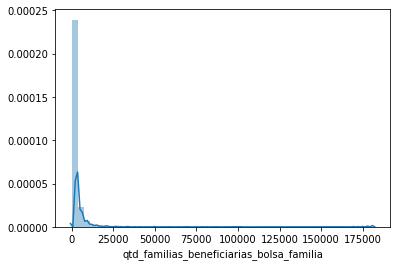

In [135]:
sns.distplot(data_origin['qtd_familias_beneficiarias_bolsa_familia'])

##### Variável "idhm"

In [136]:
data_origin['idhm'].describe()

count    5565.000000
mean      659.157412
std        71.997282
min       418.000000
25%       599.000000
50%       665.000000
75%       718.000000
max       862.000000
Name: idhm, dtype: float64

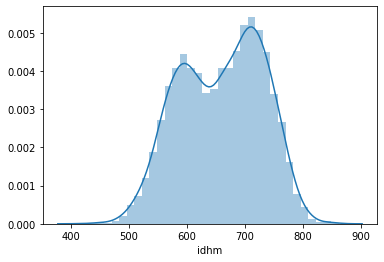

In [137]:
sns.distplot(data_origin['idhm'])

Neste ponto, verificou-se que a variável "idhm" possuía alguns registros com valores muito próximos de zero, indicando que estão fora da distribuição que seria para valores acima de 400.

Em verificação individual destes casos, percebeu-se que os registros estão apenas transformados para valores entre 0 e 1. Por exemplo, para o Município de Cabixi, em Rondônia, o valor que se verificou foi 0,65. Entretanto, o seu IDHM foi avaliado em 650.

Sendo assim, foi necessário realizar a transformação desses casos para que todos fiquem com a mesma base.

O mesmo precisou ser feito para as colunas "idhm_e", "idhm_l" e "idhm_r", que são os índices que compõem diretamente o idhm, sendo respectivamente os índices de Educação, Longevidade e Renda.

Também precisou ser feito para as colunas: "i_freq_prop": Subíndice de frequência escolar - IDHM Educação; "i_escolaridade": Subíndice de escolaridade - IDHM Educação

##### Variável "idhm_e"

In [138]:
data_origin['idhm_e'].describe()

count    5565.000000
mean      559.093980
std        93.327747
min       207.000000
25%       490.000000
50%       560.000000
75%       631.000000
max       825.000000
Name: idhm_e, dtype: float64

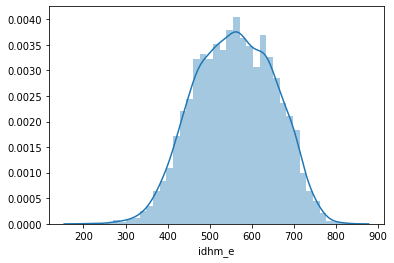

In [139]:
sns.distplot(data_origin['idhm_e'])

##### Variável "idhm_l"

In [140]:
data_origin['idhm_l'].describe()

count    5565.00000
mean      801.56442
std        44.68086
min       672.00000
25%       769.00000
50%       808.00000
75%       836.00000
max       894.00000
Name: idhm_l, dtype: float64

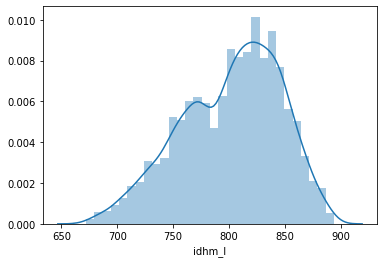

In [141]:
sns.distplot(data_origin['idhm_l'])

##### Variável "idhm_r"

In [142]:
data_origin['idhm_r'].describe()

count    5565.000000
mean      642.873136
std        80.661672
min       400.000000
25%       572.000000
50%       654.000000
75%       707.000000
max       891.000000
Name: idhm_r, dtype: float64

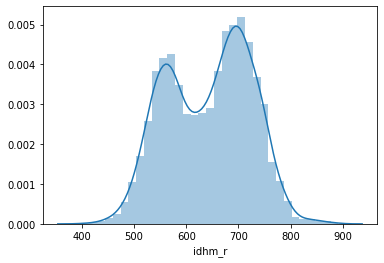

In [143]:
sns.distplot(data_origin['idhm_r'])

Percebe-se que os índices que compõem o IDHM possuem dois picos, exceto o IDHM-E

##### Variável "i_freq_prop": Subíndice de frequência escolar - IDHM Educação

In [144]:
data_origin['i_freq_prop'].describe()

count    5565.000000
mean      668.343935
std        96.125319
min       268.000000
25%       603.000000
50%       670.000000
75%       741.000000
max       962.000000
Name: i_freq_prop, dtype: float64

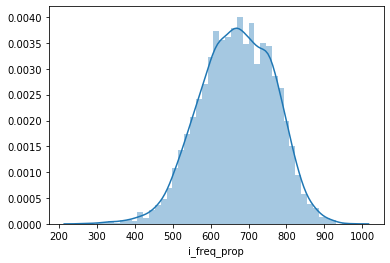

In [145]:
sns.distplot(data_origin['i_freq_prop'])

##### Variável "i_escolaridade": Subíndice de escolaridade - IDHM Educação

In [146]:
data_origin['i_escolaridade'].describe()

count    5565.000000
mean      396.691824
std       105.885127
min       120.000000
25%       315.000000
50%       384.000000
75%       464.000000
max       800.000000
Name: i_escolaridade, dtype: float64

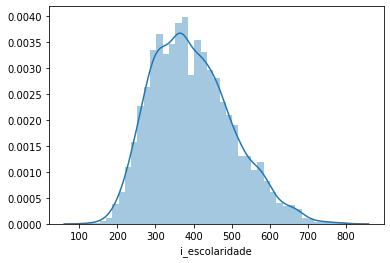

In [147]:
sns.distplot(data_origin['i_escolaridade'])

##### Variável "theil": Índice de Theil - L

In [148]:
data_origin['theil'].describe()

count    5565.000000
mean        0.455695
std         0.130366
min         0.140000
25%         0.360000
50%         0.440000
75%         0.530000
max         1.360000
Name: theil, dtype: float64

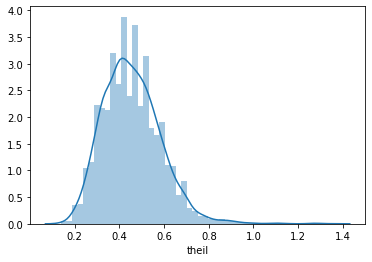

In [149]:
sns.distplot(data_origin['theil'])

##### Variável "gini": Índice de Gini

Mede o grau de desigualdade existente na distribuição de indivíduos segundo a renda domiciliar per capita. Seu valor varia de 0, quando não há desigualdade (a renda domiciliar per capita de todos os indivíduos tem o mesmo valor), a 1, quando a desigualdade é máxima (apenas um indivíduo detém toda a renda).O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.

In [150]:
data_origin['gini'].describe()

count    5565.000000
mean        0.494381
std         0.066075
min         0.280000
25%         0.450000
50%         0.490000
75%         0.540000
max         0.800000
Name: gini, dtype: float64

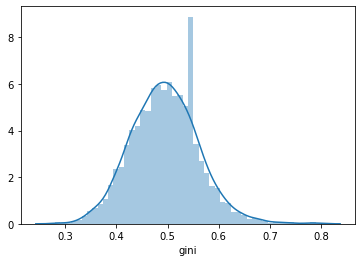

In [151]:
sns.distplot(data_origin['gini'])

##### Variável "pmpob": % de pobres

Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 140,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.

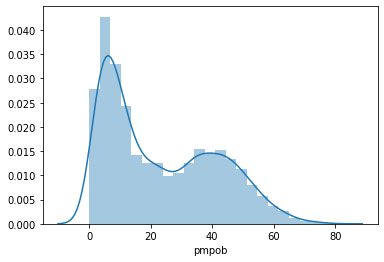

In [152]:
sns.distplot(data_origin['pmpob'])

##### Variável "pind": Proporção de extremamente pobres

Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 70,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.

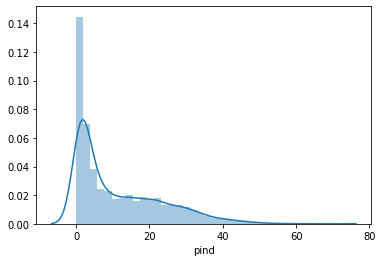

In [153]:
sns.distplot(data_origin['pind'])

In [154]:
data_origin['pesotot'].describe()

count    5.565000e+03
mean     3.427777e+04
std      2.031126e+05
min      8.050000e+02
25%      5.235000e+03
50%      1.093400e+04
75%      2.342400e+04
max      1.125350e+07
Name: pesotot, dtype: float64

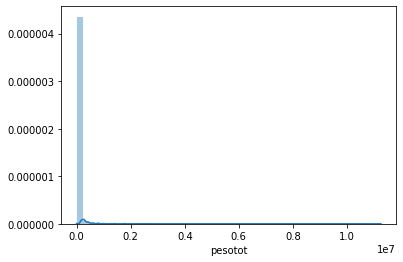

In [155]:
sns.distplot(data_origin['pesotot'])

### Tratamento dos dados

#### Retirando colunas com valores não-numéricos e de códigos pertencentes a domínios

In [156]:
#Utilizando o método drop para a retirada de variáveis (colunas) do conjunto de dados
data_clean = data_origin.drop(columns=['ano', 'codmun6', 'ibge', 'anomes', 'uf', 'codmun7', 'município'], axis = 1)

#### Avaliando a correlação de variáveis

Utilizando o gráfico de correlação com a intenção de avaliar se há variáveis com forte correlação e podem ser eliminadas do modelo sem perda de informação relevante para a fase de predição.

O gráfico apresenta uma relação um-pra-um de cada variáveis e exibe uma cor indicando o grau de correlação. Quanto mais próximo do valor "1", que é a cor mais clara, mais correlacionadas entre si as variáveis são.

Foi utilizado o método "corr()" do Pandas DataFrame e a visualização em gráfico de calor da biblioteca Seaborn.

In [157]:
#Utilizando o método corr para obter a correlação entre as variáveis
corrmat = data_clean.corr()

#Biblioteca Seaborn possui um gráfico de calor para exibir a correlação
f, ax = plt.subplots(figsize=(192, 144))
sns.heatmap(corrmat, vmax=1, square=True);

Percebe-se uma grande região bastante clara na parte inferior direita. Sendo assim, precisaremos avaliar  essas correlações.

Vamos imprimir toda a matriz de correlação:

In [158]:
corrmat.to_csv('variáveis correlacionadas.csv')

Vamos proceder com a remoção de variáveis cujo grau de correlação exceda 0.999

In [159]:
data_clean = data_clean.drop(columns=['idhm_l', 't_analf18m', 'i_escolaridade', 'rdpct', 'homem10a14', 'homem5a9', 'mulh0a4','mulh10a14', 'mulh5a9', 'peso1'], axis = 1);

In [160]:
data_clean = data_clean.drop(columns=['peso1114', 'peso1113','peso1214','peso13','peso4','peso5','peso6','peso610','peso617', 'pia1014'], axis = 1);

In [161]:
data_clean = data_clean.drop(columns=['mulh15a19','peso1517', 'peso1524', 'peso1618', 'peso1820','peso1824','peso1921','pia1517','homem25a29','mulh20a24'], axis = 1);

In [162]:
data_clean = data_clean.drop(columns=['mulh25a29', 'homem35a39', 'homem40a44', 'homemtot','mulh30a34','mulh35a39','pea','pea18m','pesotot','pop'], axis = 1);

In [163]:
data_clean = data_clean.drop(columns=['popt','homem50a54','mulh45a49','peso15','peso18','peso25','pia','pia18m','homem60a64','mulh50a54'], axis = 1);

In [164]:
data_clean = data_clean.drop(columns=['mulh55a59','homem70a74','mulh60a64','peso65','mulhertot','pesourb','mulh70a74','mulher80','pesom1517','pesom25m'], axis = 1);

In [165]:
corrmat = data_clean.corr()
f, ax = plt.subplots(figsize=(192, 144))
sns.heatmap(corrmat, vmax=1, square=True);
corrmat.to_csv('variáveiscorrelacionadas_aposexclusoes.csv')

Foram removidas 60 variáveis. É possível visualizar pelos gráficos de calor que as áreas brancas foram reduzidas.

#### Verificando valores nulos nas variáveis

Por fim, foi utilizado abaixo um algoritmo de verificação de existência de valores nulos.

In [166]:
#Utilizando o método isnull do Pandas para verificar valores nulos e somar as ocorrências
total = data_clean.isnull().sum().sort_values(ascending=False)
#Calculando o percentual dos valores nulos
percent = (data_clean.isnull().sum()/data_clean.isnull().count()).sort_values(ascending=False)

#Imprimindo os 20 maiores valores com nulos
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
idhm_r,0,0.0
t_fund12a14,0,0.0
t_med18m,0,0.0
t_med18a24,0,0.0
t_med18a20,0,0.0
t_fund25m,0,0.0
t_fund18m,0,0.0
t_fund18a24,0,0.0
t_fund16a18,0,0.0
t_fund15a17,0,0.0


### Preparação e execução de modelos

Abaixo, vamos inicialmente separar nosso dataset em conjunto de treinamento de conjunto de teste para, em seguida, iniciar a instanciação dos modelos e sua respectiva verificação de hyper-parâmetros

#### Separando os conjuntos de dados de treinamento e teste

In [167]:
#Os valores a serem previstos serão colocados na variável 'y'
y = data_clean['valor_repassado_bolsa_familia']

#As demais colunas serão colocados na variável 'X'. 
X = data_clean.drop(columns=['qtd_familias_beneficiarias_bolsa_familia','valor_repassado_bolsa_familia' ])

#Separando o conjunto de dados em subconjunto de teste e de treinamento com separação padrão: 25% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

A cada modelo, seguirá a utilização dos métodos fit e predict
Em seguida, a verificação do score, comparando com os dados de teste
Por fim, a visualização em gráfico do resultado das predições

A otimização dos modelos utiliza GridSearch da biblioteca scikit-learn com a verificação de diversos hyper-parâmetros.
Em seguida, os parâmetros finais são impressos, assim como o score final, que é o maior score dentre os parâmetros utilizados


#### LinearRegression

{'fit_intercept': 'True'}
0.9620326901721207
0.9450033435831922


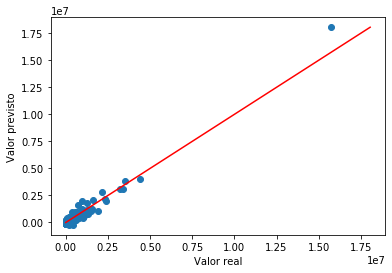

In [168]:
#Elencando os parâmetros que serão testados
parameters = {'fit_intercept':('True', 'False')}

#Instanciando o modelo de Regressão Linear
model1 = LinearRegression()

#Instanciando o GridSearch, utilizando estratégia de cross-validation K-Fold com 5 subconjunto de dados
clf = GridSearchCV(model1, parameters, cv=5)
#Realizando o treinamento com os diversos parâmetros e utilizando a estratégia de cross-validation
clf.fit(X, y)

#Imprimindo os parâmetros do modelo que atingiu o melhor score
print(clf.best_params_)
#Imprimindo o score correspondente
print(clf.score(X_test,y_test))

#Treinando o modelo com os melhores parâmetros para um único subconjunto escolhido aleatoriamente
model1 = clf.best_estimator_
model1.fit(X_train, y_train)
#Realizando as predições e verificando o score final do modelo
y_predicted1 = model1.predict(X_test)
print(model1.score(X_test,y_test))

#Imprimindo um gráfico para visualizar os valores previstos vs. valores reais
%matplotlib inline
plt.scatter(y_test, y_predicted1)
range = [y_test.min(), y_predicted1.max()]
plt.plot(range, range, 'red')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.show()

#### DecisionTreeRegressor

{'criterion': 'mse', 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'random'}
0.9888924818338282
0.680977227246921


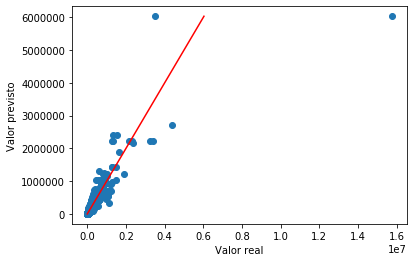

In [169]:
#Elencando os parâmetros que serão testados
parameters = {'criterion':('mse','friedman_mse','mae'),'splitter':('best','random'),'min_samples_split':[2,4,6,8,10],'min_samples_leaf':[1,5,10]}

#Instanciando o modelo 
model2 = DecisionTreeRegressor(random_state=100)

#Instanciando o GridSearch, utilizando estratégia de cross-validation K-Fold com 5 subconjunto de dados
clf = GridSearchCV(model2, parameters, cv=5)
#Realizando o treinamento com os diversos parâmetros e utilizando a estratégia de cross-validation
clf.fit(X, y)

#Imprimindo os parâmetros do modelo que atingiu o melhor score
print(clf.best_params_)
#Imprimindo o score correspondente
print(clf.score(X_test,y_test))

#Treinando o modelo com os melhores parâmetros para um único subconjunto escolhido aleatoriamente
model2 = clf.best_estimator_
model2.fit(X_train, y_train)
#Realizando as predições e verificando o score final do modelo
y_predicted2 = model2.predict(X_test)
print(model2.score(X_test,y_test))

#Imprimindo um gráfico para visualizar os valores previstos vs. valores reais
%matplotlib inline
plt.scatter(y_test, y_predicted2)
range = [y_test.min(), y_predicted2.max()]
plt.plot(range, range, 'red')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.show()

In [170]:
#O modelo de Árvore de decisão possui a capacidade de identificar quais foram as variáveis mais importantes
#para a realização das predições
#Esse código abaixo obtém essas variáveis e imprime o percentual de importância em ordem crescente
feature_labels = X_train.columns
importance = model2.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

t_med18a24-0.00%
t_flfund-0.00%
t_fund18m-0.00%
r2040-0.00%
t_fund16a18-0.00%
p_fund-0.00%
t_med25m-0.00%
t_banagua-0.00%
r1040-0.00%
t_ativ18m-0.00%
t_fund12a14-0.00%
pren60-0.00%
t_med18a20-0.00%
pren20ricos-0.00%
t_atraso_2_basico-0.00%
t_flmed-0.00%
t_atraso_0_basico-0.00%
rdpc5-0.00%
t_fundin_todos-0.00%
t_crifundin_todos-0.00%
t_des-0.00%
t_atraso_1_fund-0.00%
theil-0.00%
p_med-0.00%
t_atraso_1_basico-0.00%
t_sluz-0.00%
t_fund18a24-0.00%
sobre60-0.00%
idhm_r-0.00%
t_freqsuper1517-0.00%
t_ativ1014-0.00%
t_freq0a3-0.00%
trabcc-0.00%
t_atraso_0_med-0.00%
pren10ricos-0.00%
t_agua-0.00%
p_siup-0.00%
t_super25m-0.00%
t_med18m-0.00%
ren3-0.00%
t_des1824-0.00%
t_fund25m-0.00%
t_freqmed1824-0.00%
idhm-0.00%
t_freq6-0.00%
t_atraso_2_med-0.00%
p_super-0.00%
p_extr-0.00%
pea1517-0.00%
t_rmaxidoso-0.00%
t_freq11a14-0.00%
p_serv-0.00%
t_freq6a14-0.00%
t_freq25a29-0.00%
t_fund11a13-0.00%
cpr-0.00%
p_transf-0.00%
rdpc2-0.00%
pren20-0.00%
agua_esgoto-0.00%
gini-0.00%
renocup-0.00%
t_med19a21-0.00

#### RandomForestRegressor

In [ ]:
#Elencando os parâmetros que serão testados
parameters = {'n_estimators':[10,15], 'criterion':('mse','friedman_mse','mae'),'min_samples_split':[2,4],'min_samples_leaf':[1,5]}

#Instanciando o modelo 
model3 = RandomForestRegressor(random_state=1)

#Instanciando o GridSearch, utilizando estratégia de cross-validation K-Fold com 5 subconjunto de dados
clf = GridSearchCV(model3, parameters, cv=5)
#Realizando o treinamento com os diversos parâmetros e utilizando a estratégia de cross-validation
clf.fit(X, y)

#Imprimindo os parâmetros do modelo que atingiu o melhor score
print(clf.best_params_)
#Imprimindo o score correspondente
print(clf.score(X_test,y_test))

#Treinando o modelo com os melhores parâmetros para um único subconjunto escolhido aleatoriamente
model3 = clf.best_estimator_
model3.fit(X_train, y_train)
#Realizando as predições e verificando o score final do modelo
y_predicted3 = model3.predict(X_test)
print(model3.score(X_test,y_test))

#Imprimindo um gráfico para visualizar os valores previstos vs. valores reais
%matplotlib inline
plt.scatter(y_test, y_predicted3)
range = [y_test.min(), y_predicted3.max()]
plt.plot(range, range, 'red')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.show()

In [41]:
#O modelo de Floresta aleatória também possui a capacidade de identificar quais foram as variáveis mais importantes
#para a realização das predições, pois também é baseado em árvore de decisão
#Esse código abaixo obtém essas variáveis e imprime o percentual de importância em ordem crescente
feature_labels = X_train.columns
importance = model3.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

gini-0.00%
rdpc10-0.00%
t_fundin_todos-0.00%
p_fund-0.00%
t_fora6a14-0.00%
idhm_e-0.00%
t_freq15a17-0.00%
t_fund16a18-0.00%
t_fund18a24-0.00%
t_med25m-0.00%
pren60-0.00%
t_med18a20-0.00%
ren3-0.00%
idhm-0.00%
theil-0.00%
t_atraso_1_med-0.00%
rdpc5-0.00%
t_atraso_0_fund-0.00%
p_super-0.00%
t_des1824-0.00%
t_atraso_0_basico-0.00%
parede-0.00%
t_freqfund1824-0.00%
t_fbsuper-0.00%
t_freq11a14-0.00%
t_freq6a17-0.00%
t_fbmed-0.00%
t_des-0.00%
pren10ricos-0.00%
rdpc-0.00%
t_fora4a5-0.00%
pren20ricos-0.00%
t_freq4a5-0.00%
t_freq6a14-0.00%
p_extr-0.00%
r1040-0.00%
t_med18a24-0.01%
t_freq5a6-0.01%
t_fund11a13-0.01%
t_freq25a29-0.01%
t_atraso_2_med-0.01%
rind-0.01%
pren20-0.01%
t_atraso_1_basico-0.01%
t_freqsuper1517-0.01%
t_freqfund45-0.01%
cpr-0.01%
t_luz-0.01%
t_flfund-0.01%
t_fund12a14-0.01%
i_freq_prop-0.01%
t_sluz-0.01%
t_med18m-0.01%
p_serv-0.01%
t_mulchefefif014-0.01%
trabpub-0.01%
t_freqmed614-0.01%
t_flsuper-0.01%
ren5-0.01%
t_med19a21-0.01%
t_freq0a3-0.01%
p_constr-0.01%
t_flmed-0.01%


#### HuberRegressor

C:\Users\helto\Anaconda3\envs\projetofinal\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.001, 'epsilon': 1.5, 'fit_intercept': 'True', 'max_iter': 500}
0.13728912439202345
0.13678108173028547


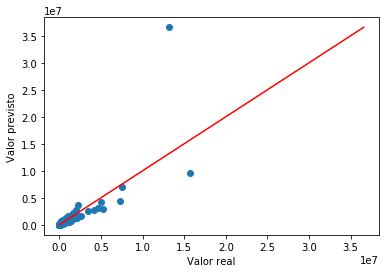

In [42]:
#Elencando os parâmetros que serão testados
parameters = {'epsilon':[1.0, 1.2, 1.35,1.5], 'max_iter':[100,200,500],'alpha':[.0001,.0002,.001],'fit_intercept':('True', 'False')}

#Instanciando o modelo 
model4 = HuberRegressor()

#Instanciando o GridSearch, utilizando estratégia de cross-validation K-Fold com 5 subconjunto de dados
clf = GridSearchCV(model4, parameters, cv=4)
#Realizando o treinamento com os diversos parâmetros e utilizando a estratégia de cross-validation
clf.fit(X, y)

#Imprimindo os parâmetros do modelo que atingiu o melhor score
print(clf.best_params_)
#Imprimindo o score correspondente
print(clf.score(X_test,y_test))

#Treinando o modelo com os melhores parâmetros para um único subconjunto escolhido aleatoriamente
model4 = clf.best_estimator_
model4.fit(X_train, y_train)
#Realizando as predições e verificando o score final do modelo
y_predicted4 = model4.predict(X_test)
print(model4.score(X_test,y_test))

#Imprimindo um gráfico para visualizar os valores previstos vs. valores reais
%matplotlib inline
plt.scatter(y_test, y_predicted4)
range = [y_test.min(), y_predicted4.max()]
plt.plot(range, range, 'red')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.show()

#### SVM: LinearSVR

C:\Users\helto\Anaconda3\envs\projetofinal\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\helto\Anaconda3\envs\projetofinal\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\helto\Anaconda3\envs\projetofinal\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\helto\Anaconda3\envs\projetofinal\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\helto\Anaconda3\envs\projetofinal\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblin

{'C': 10, 'loss': 'epsilon_insensitive', 'max_iter': 100000}
0.19934175984698066
0.1471370907509123


C:\Users\helto\Anaconda3\envs\projetofinal\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


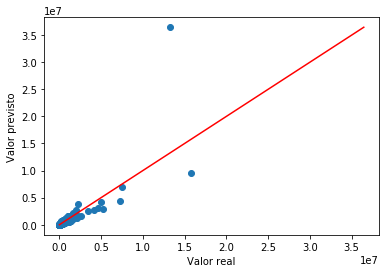

In [43]:
#Elencando os parâmetros que serão testados
parameters = {'loss':('epsilon_insensitive', 'squared_epsilon_insensitive'), 'C':[1, 10], 'max_iter':[1000, 10000,100000]}

#Instanciando o modelo 
model5 = LinearSVR(random_state=1)

#Instanciando o GridSearch, utilizando estratégia de cross-validation K-Fold com 5 subconjunto de dados
clf = GridSearchCV(model5, parameters, cv=3)
#Realizando o treinamento com os diversos parâmetros e utilizando a estratégia de cross-validation
clf.fit(X, y)

#Imprimindo os parâmetros do modelo que atingiu o melhor score
print(clf.best_params_)
#Imprimindo o score correspondente
print(clf.score(X_test,y_test))

#Treinando o modelo com os melhores parâmetros para um único subconjunto escolhido aleatoriamente
model5 = clf.best_estimator_
model5.fit(X_train, y_train)
#Realizando as predições e verificando o score final do modelo
y_predicted5 = model5.predict(X_test)
print(model5.score(X_test,y_test))

#Imprimindo um gráfico para visualizar os valores previstos vs. valores reais
%matplotlib inline
plt.scatter(y_test, y_predicted5)
range = [y_test.min(), y_predicted5.max()]
plt.plot(range, range, 'red')
plt.xlabel('Valor real')
plt.ylabel('Valor previsto')
plt.show()

### Verificação final

Como análise final, após a predição dos modelos, o modelo com maior score foi escolhido e verificado quais são os dois casos com maior diferença entre o valor previsto e o final. A hipótese é que esses seriam as duas cidades com maior diferença entre o padrão observado nas outras cidades e o valor repassado final

In [44]:
#Este algoritmo identifica quais são os pontos com as maiores diferenças quando o valor real é maior que o valor estimado

x = 0
maior = 0
segundo_maior = 0

for i in y_test :
    if (maior < (i - y_predicted1[x])) and (y_predicted1[x] > 0):
        maior = i - y_predicted1[x]
        ponto = i
        previsto = y_predicted1[x]

    else:
        if (segundo_maior < (i - y_predicted1[x])) and (y_predicted1[x] > 0):
            segundo_maior = i - y_predicted1[x]
            segundo_ponto = i
            segundo_previsto = y_predicted1[x]

    #print("%d - %f | | %f || diferença = %f" % (x, y_predicted1[x], i, (i - y_predicted1[x])))
    x += 1
    
print(maior)
print(ponto)
print(previsto)

print(segundo_maior)
print(segundo_ponto)
print(segundo_previsto)

5214875.944342997
15740454.0
10525578.055657003
1214199.5097310655
2551486.0
1337286.4902689345


Os dois pontos observados correspondem às cidades de Recife-PE e Campinas-SP.